<h1><B><u>FEATURE SELECTION</u></h1></B>

<u><h2><B>IMPLEMENATION OF BORUTA FOR FEATURE SELECTION</B></h2></u>

In [330]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.ensemble import ExtraTreesRegressor

In [546]:
df = pd.read_csv('/Users/saurabhkulkarni/Downloads/Appliances-energy-prediction-data-master/energydata_complete.csv')

In [547]:
def featureengineering(energy):
    # Converting datatype of Date column to date time
    energy['date'] = pd.to_datetime(energy['date'])

    # Removing rv2 feature
    del energy['rv2']
    
    # Removing T9 feature
    del energy['T9']
    
    # Removing T6 feature
    del energy['T6']
    
    # Removing rv1
    del energy['rv1']
    
    # To get the month for that record
    energy['month'] = energy['date'].dt.month

    # To get the specific time for that record
    #energy['time'] = energy['date'].dt.time

    #---------------------------------------------------
    p = []
    q = []
    for i in energy['date']:
        p.append(i.strftime("%j"))
        q.append(i.hour * 60 + i.minute)
        
    p=list(map(int, p))
    #---------------------------------------------------

    # To get the Day of the year for that record
    energy['DOY'] = pd.DataFrame({'DOY': p})

    # To get the minutes from midnight for that record
    energy['NSM'] = pd.DataFrame({'NSM': q})

    # To get the only date 
    #energy['Only_Date'] = energy['date'].dt.date
    #energy['Only_Date'] = pd.to_datetime(energy['Only_Date'])
    
    # To get the weekday for that record
    energy['Day of Week'] = energy['date'].dt.weekday
    
    # Now as we have DOY (Day of year) and MNM, we can remove date variable.
    del energy['date']
    
    # Generating training and testing dataset
    from sklearn.model_selection import train_test_split
    
    energy_train, energy_test = train_test_split(energy, test_size=0.2)

    #energy.sort_index()
    #energy_train = energy[0:int(energy.shape[0]*0.8)]
    #energy_test = energy[int(energy.shape[0]*0.8):]
    
    return energy_train, energy_test

In [548]:
df_train, df_test = featureengineering(df)

In [570]:
df_train = df_train.sort_index()
df_test = df_test.sort_index()

In [571]:
training_data = df_train.drop(['Appliances'],axis=1)

In [582]:
testing_data = df_test.drop(['Appliances'],axis=1)

In [573]:
# load X and y
# NOTE BorutaPy accepts numpy arrays only, hence the .values attribute
X = training_data.values
y = df_train['Appliances'].values

# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
rf = RandomForestRegressor(n_estimators=100, max_depth=5)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2)

# find all relevant features
feat_selector.fit(X, y)

# check selected features
feat_selector.support_

# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	27
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	27
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	27
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	27
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	27
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	27
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	27
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	5
Tentative: 	10
Rejected: 	12
Iteration: 	9 / 100
Confirmed: 	5
Tentative: 	10
Rejected: 	12
Iteration: 	10 / 100
Confirmed: 	5
Tentative: 	10
Rejected: 	12
Iteration: 	11 / 100
Confirmed: 	5
Tentative: 	10
Rejected: 	12
Iteration: 	12 / 100
Confirmed: 	6
Tentative: 	9
Rejected: 	12
Iteration: 	13 / 100
Confirmed: 	6
Tentative: 	9
Rejected: 	12
Iteration: 	14 / 100
Confirmed: 	6
Tentative: 	9
Rejected: 	12
Iteration: 	15 / 100
Confirmed: 	6
Tentative: 	9
Rejected: 	12
Iteration: 	16 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 

In [583]:
feat_selector.support_

array([ True, False, False, False,  True,  True,  True, False,  True,
       False,  True, False, False,  True,  True, False, False, False,
        True,  True, False, False, False, False,  True,  True, False], dtype=bool)

In [584]:
feat_selector.ranking_

array([ 1, 12,  9,  7,  1,  1,  1, 13,  1,  4,  1,  3,  4,  1,  1, 11,  9,
        6,  1,  1,  9, 15,  2, 16,  1,  1, 14])

In [586]:
sel_columns = []
for i in range(len(training_data.columns)):
    print(str(training_data.columns[i])+" : "+str(feat_selector.support_[i])+", rank: "+str(feat_selector.ranking_[i]))
    if feat_selector.ranking_[i] == 1:
        sel_columns.append(str(training_data.columns[i]))

lights : True, rank: 1
T1 : False, rank: 12
RH_1 : False, rank: 9
T2 : False, rank: 7
RH_2 : True, rank: 1
T3 : True, rank: 1
RH_3 : True, rank: 1
T4 : False, rank: 13
RH_4 : True, rank: 1
T5 : False, rank: 4
RH_5 : True, rank: 1
RH_6 : False, rank: 3
T7 : False, rank: 4
RH_7 : True, rank: 1
T8 : True, rank: 1
RH_8 : False, rank: 11
RH_9 : False, rank: 9
T_out : False, rank: 6
Press_mm_hg : True, rank: 1
RH_out : True, rank: 1
Windspeed : False, rank: 9
Visibility : False, rank: 15
Tdewpoint : False, rank: 2
month : False, rank: 16
DOY : True, rank: 1
NSM : True, rank: 1
Day of Week : False, rank: 14


In [587]:
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

import seaborn as sns
import numpy as np

#Xtrn, Xtest, Ytrn, Ytest = train_test_split(training_data[sel_columns], df_train['Appliances'],test_size=0.2,random_state=42)

Xtrn = training_data[sel_columns]
Ytrn = df_train['Appliances']

Xtest = testing_data[sel_columns]
Ytest = df_test['Appliances']

# model = RandomForestRegressor(n_estimators=150, max_features='sqrt', n_jobs=-1)  # случайный лес
model = ExtraTreesRegressor()


tmp = {}


# get model name
m = str(model)

# fit model on training dataset
model.fit(Xtrn, Ytrn)
# predict consumption
predictions = model.predict(Xtest)
#Evaluation for Testing set
#R2 score
R2_test_b = r2_score(Ytest,predictions)
print("R2_test:",R2_test_b)
#Mean Absolute Error(MAE)
MAE_test_b= mean_absolute_error(Ytest,predictions)
print('MAE_test:',MAE_test_b)
#Mean Squared Error(MSE)
MSE_test_b= mean_squared_error(Ytest,predictions)
print('MSE_test:',MSE_test_b)
#Root Mean Squared Error (RMSE)
RMSE_test_b= np.sqrt(mean_squared_error(Ytest,predictions))
print('RMSE_test:',RMSE_test_b)
#Evaluation for Training test
predictions_trn = model.predict(Xtrn)
#R2_Score
R2_train_b = r2_score(Ytrn,predictions_trn)
print('R2_train:',R2_train_b)
#Mean Absolute Error(MAE)
MAE_train_b= mean_absolute_error(Ytrn,predictions_trn)
print('MAE_train:',MAE_train_b)
#Mean Squared Error(MSE)
MSE_train_b= mean_squared_error(Ytrn,predictions_trn)
print('MSE_train:',MSE_train_b)
#Root Mean Squared Error (RMSE)
RMSE_train_b = np.sqrt(mean_squared_error(Ytrn,predictions_trn))
print('RMSE_train:',RMSE_train_b)







R2_test: 0.541504207278
MAE_test: 30.4276665822
MSE_test: 4142.00253357
RMSE_test: 64.3583913221
R2_train: 0.999999848588
MAE_train: 0.00114010640993
MSE_train: 0.0016468203699
RMSE_train: 0.0405810346086


In [588]:
from sklearn.metrics import explained_variance_score

In [589]:
explained_variance_score(Ytest, predictions)

0.5425963867407616

<b>1)We can see that the initial dataset contained columns namely 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5','RH_5', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'RH_9', 'T_out','Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint','month', 'DOY', 'NSM', 'Day of Week'<br><br>2)After using boruta package the columns which boruta identified as relevant ones are'lights','RH_2','T3','RH_3','RH_4','RH_5','RH_7','T8','Press_mm_hg','RH_out','DOY','NSM'. Boruta only selects those colunms whose rank is 1 and recommends to drop other ones.</b>

<u><h2><b>IMPLEMENTATION OF FORWARD AND BACKWARD SELECTION</b></h2><u>

In [590]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

X = training_data
y = df_train['Appliances']


def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
   
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included,pvalues

result,pvalues = stepwise_selection(X, y)

print('resulting features:')
print(result)

Add  NSM                            with p-value 3.23065e-166
Add  lights                         with p-value 5.6708e-85
Add  RH_out                         with p-value 9.75729e-45
Add  RH_1                           with p-value 1.71079e-41
Add  RH_7                           with p-value 8.39661e-66
Add  RH_2                           with p-value 9.87499e-49
Add  RH_8                           with p-value 6.2177e-13
Drop RH_out                         with p-value 0.623901
Add  Windspeed                      with p-value 4.38084e-11
Add  T3                             with p-value 2.61048e-09
Add  T2                             with p-value 8.59357e-90
Add  month                          with p-value 3.33014e-26
Add  T4                             with p-value 2.2809e-12
Add  Tdewpoint                      with p-value 5.3945e-05
Add  RH_3                           with p-value 0.00025239
Add  T8                             with p-value 7.20872e-05
Add  T1                        

<u><b><i>STORING THE RELEVANT FEATURES, WHICH CAN BE USED LATER ON</i></b></u>

In [591]:
pvalues= pd.DataFrame(pvalues).reset_index().rename(columns={'index':'feature',0:'value'})

<u><i><b>FEATURE IMPORTANCE BASED ON P-VALUE</b></i></u>

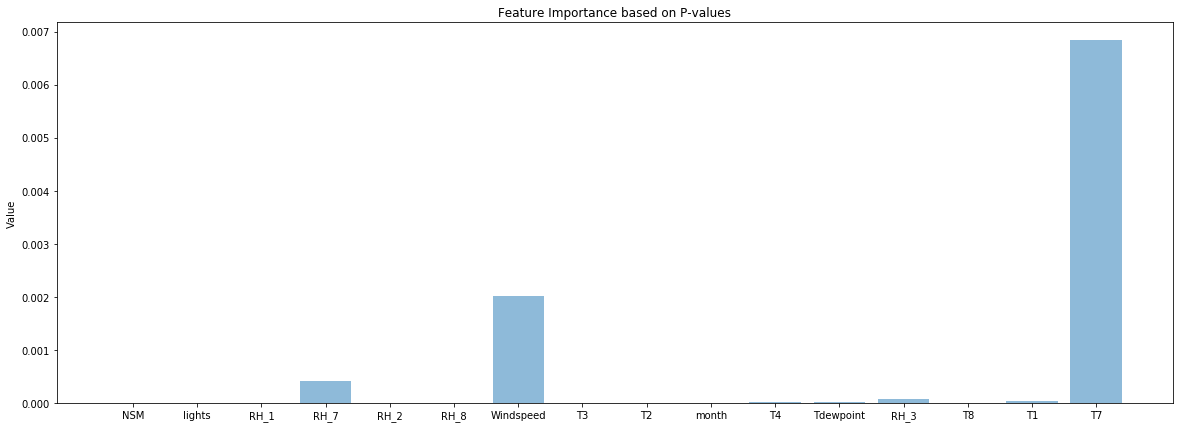

In [592]:
y_pos = np.arange(len(pvalues))
performance = pvalues['value']

plt.figure(figsize=(20,7))
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, pvalues['feature'])
plt.ylabel('Value')
plt.title('Feature Importance based on P-values')
plt.show()

In [593]:
Fo_ba_features = result

In [594]:

#prepare dataset  
#....   
#spilt dataset
#Xtrn, Xtest, Ytrn, Ytest = train_test_split(df[Req_Columns[0:i]], df['Appliances'],test_size=0.2,random_state=42)


#Xtrn, Xtest, Ytrn, Ytest = train_test_split(training_data[Fo_ba_features], df_train['Appliances'],test_size=0.2,random_state=42)

Xtrn = training_data[Fo_ba_features]
Ytrn = df_train['Appliances']

Xtest = testing_data[Fo_ba_features]
Ytest = df_test['Appliances']

# model = RandomForestRegressor(n_estimators=150, max_features='sqrt', n_jobs=-1)  # случайный лес
model = ExtraTreesRegressor()

# get model name
m = str(model)

# fit model on training dataset
model.fit(Xtrn, Ytrn)
# predict consumption
predictions = model.predict(Xtest)
#Evaluation for Testing set
#R2 score
R2_test_fb = r2_score(Ytest,predictions)
print("R2_test:",R2_test_fb)
#Mean Absolute Error(MAE)
MAE_test_fb= mean_absolute_error(Ytest,predictions)
print('MAE_test:',MAE_test_fb)
#Mean Squared Error(MSE)
MSE_test_fb= mean_squared_error(Ytest,predictions)
print('MSE_test:',MSE_test_fb)
#Root Mean Squared Error (RMSE)
RMSE_test_fb= np.sqrt(mean_squared_error(Ytest,predictions))
print('RMSE_test:',RMSE_test_fb)
#Evaluation for Training test
predictions_trn = model.predict(Xtrn)
#R2_Score
R2_train_fb = r2_score(Ytrn,predictions_trn)
print('R2_train:',R2_train_fb)
#Mean Absolute Error(MAE)
MAE_train_fb= mean_absolute_error(Ytrn,predictions_trn)
print('MAE_train:',MAE_train_fb)
#Mean Squared Error(MSE)
MSE_train_fb= mean_squared_error(Ytrn,predictions_trn)
print('MSE_train:',MSE_train_fb)
#Root Mean Squared Error (RMSE)
RMSE_train_fb = np.sqrt(mean_squared_error(Ytrn,predictions_trn))
print('RMSE_train:',RMSE_train_fb)

R2_test: 0.56511887411
MAE_test: 28.9969597162
MSE_test: 3928.67012921
RMSE_test: 62.6791044066
R2_train: 0.999999161408
MAE_train: 0.00152014187991
MSE_train: 0.00912085127945
RMSE_train: 0.0955031480081


<b>The forward and backward selection process evaluates the relevant features by calculating P-VALUES. In our case it has recommended to add features which are as follows: 'NSM', 'lights', 'RH_1', 'RH_7', 'RH_2', 'RH_8', 'Windspeed', 'T3', 'T2', 'month', 'T4', 'Tdewpoint', 'RH_3', 'T8', 'T1', 'T7'</b>

<u><h2><b>IMPLEMENTATION OF TSFRESH</b></h2></u>

In [617]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import make_forecasting_frame
from sklearn.ensemble import AdaBoostRegressor
from tsfresh.utilities.dataframe_functions import impute

from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

import seaborn as sns
import numpy as np
import datetime as dt
import warnings
warnings.filterwarnings('ignore')



In [596]:
tsfresh_extracted = extract_features(training_data, column_id='NSM', column_sort="T1", column_value="lights", impute_function=impute, 
                     show_warnings=False)

Feature Extraction: 100%|██████████| 10/10 [00:23<00:00,  2.35s/it]
 'lights__fft_coefficient__coeff_62__attr_"angle"'
 'lights__fft_coefficient__coeff_62__attr_"imag"'
 'lights__fft_coefficient__coeff_62__attr_"real"'
 'lights__fft_coefficient__coeff_63__attr_"abs"'
 'lights__fft_coefficient__coeff_63__attr_"angle"'
 'lights__fft_coefficient__coeff_63__attr_"imag"'
 'lights__fft_coefficient__coeff_63__attr_"real"'
 'lights__fft_coefficient__coeff_64__attr_"abs"'
 'lights__fft_coefficient__coeff_64__attr_"angle"'
 'lights__fft_coefficient__coeff_64__attr_"imag"'
 'lights__fft_coefficient__coeff_64__attr_"real"'
 'lights__fft_coefficient__coeff_65__attr_"abs"'
 'lights__fft_coefficient__coeff_65__attr_"angle"'
 'lights__fft_coefficient__coeff_65__attr_"imag"'
 'lights__fft_coefficient__coeff_65__attr_"real"'
 'lights__fft_coefficient__coeff_66__attr_"abs"'
 'lights__fft_coefficient__coeff_66__attr_"angle"'
 'lights__fft_coefficient__coeff_66__attr_"imag"'
 'lights__fft_coefficient__coef

In [614]:
temp_set = pd.read_csv('/Users/saurabhkulkarni/Downloads/Appliances-energy-prediction-data-master/energydata_complete.csv')

In [620]:
temp_set['date'] = pd.to_datetime(temp_set['date'])
temp_set['time'] = temp_set['date'].dt.time

In [625]:
temp_set = pd.DataFrame(temp_set[['time','Appliances']].groupby(['time'])['Appliances'].mean()).reset_index()

In [628]:
tsfresh_extracted = tsfresh_extracted.sort_index()

In [636]:
temp_set = temp_set.set_index(['time'])

In [638]:
#Xtrn, Xtest, Ytrn, Ytest = train_test_split(tsfresh_extracted,pd.DataFrame(pd.DataFrame(df[['Appliances','time']].groupby(['time'])['Appliances'].mean()).reset_index()['Appliances']),test_size=0.2,random_state=42)


Xtrn, Xtest, Ytrn, Ytest= train_test_split(tsfresh_extracted, temp_set, test_size = 0.2, random_state = 42)

model = ExtraTreesRegressor()



# get model name
m = str(model)

# fit model on training dataset
model.fit(Xtrn, Ytrn)
# predict consumption
predictions = model.predict(Xtest)
#Evaluation for Testing set
#R2 score
R2_test_t = r2_score(Ytest,predictions)
print("R2_test:",R2_test_t)
#Mean Absolute Error(MAE)
MAE_test_t= mean_absolute_error(Ytest,predictions)
print('MAE_test:',MAE_test_t)
#Mean Squared Error(MSE)
MSE_test_t= mean_squared_error(Ytest,predictions)
print('MSE_test:',MSE_test_t)
#Root Mean Squared Error (RMSE)
RMSE_test_t= np.sqrt(mean_squared_error(Ytest,predictions))
print('RMSE_test:',RMSE_test_t)
#Evaluation for Training test
predictions_trn = model.predict(Xtrn)
#R2_Score
R2_train_t = r2_score(Ytrn,predictions_trn)
print('R2_train:',R2_train_t)
#Mean Absolute Error(MAE)
MAE_train_t= mean_absolute_error(Ytrn,predictions_trn)
print('MAE_train:',MAE_train_t)
#Mean Squared Error(MSE)
MSE_train_t= mean_squared_error(Ytrn,predictions_trn)
print('MSE_train:',MSE_train_t)
#Root Mean Squared Error (RMSE)
RMSE_train_t = np.sqrt(mean_squared_error(Ytrn,predictions_trn))
print('RMSE_train:',RMSE_train_t)

R2_test: 0.787207136716
MAE_test: 14.9866070614
MSE_test: 392.614890038
RMSE_test: 19.814512107
R2_train: 1.0
MAE_train: 9.02080342791e-15
MSE_train: 1.99314282279e-28
RMSE_train: 1.4117871025e-14


<b>TSFRESH deals with creation of calculated features based on individual entities present in the dataset.<br><br>
In the First extraction the features calculated are more than 1200 and, we can further impute the results to get more
relevant features, Or it has a extract_relevant_feature method which does all of the above in one step.</b>

<u><h2><b>IMPLEMENTATION OF RFE (RECURSIVE FEATURE SELECTION)</b></h2></u>

In [639]:
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [640]:
RFR = RandomForestRegressor(n_estimators=100, max_features='sqrt')

In [641]:
rfe = RFE(RFR, 13)

In [644]:
rfe = rfe.fit(training_data,df_train['Appliances'])

In [645]:
print(rfe.support_)
print(rfe.ranking_)
len(rfe.support_)

[False False  True False  True  True  True False False False  True  True
 False  True  True  True False False  True  True False False  True False
 False  True False]
[10  9  1  2  1  1  1  6  8  4  1  1  7  1  1  1  3  5  1  1 11 13  1 15 12
  1 14]


27

In [646]:
rfe_features = []
for i in range(len(training_data.columns)):
    if rfe.ranking_[i] == 1:
        rfe_features.append(training_data.columns[i])
    print(str(training_data.columns[i])+" : "+str(rfe.support_[i])+", rank: "+str(rfe.ranking_[i]))

lights : False, rank: 10
T1 : False, rank: 9
RH_1 : True, rank: 1
T2 : False, rank: 2
RH_2 : True, rank: 1
T3 : True, rank: 1
RH_3 : True, rank: 1
T4 : False, rank: 6
RH_4 : False, rank: 8
T5 : False, rank: 4
RH_5 : True, rank: 1
RH_6 : True, rank: 1
T7 : False, rank: 7
RH_7 : True, rank: 1
T8 : True, rank: 1
RH_8 : True, rank: 1
RH_9 : False, rank: 3
T_out : False, rank: 5
Press_mm_hg : True, rank: 1
RH_out : True, rank: 1
Windspeed : False, rank: 11
Visibility : False, rank: 13
Tdewpoint : True, rank: 1
month : False, rank: 15
DOY : False, rank: 12
NSM : True, rank: 1
Day of Week : False, rank: 14


In [647]:
training_data_rfe = training_data[rfe_features]

In [648]:
testing_data_rfe = testing_data[rfe_features]

In [649]:

#prepare dataset  
#....   
#spilt dataset
#Xtrn, Xtest, Ytrn, Ytest = train_test_split(X1_rfe, df['Appliances'],test_size=0.2,random_state=42)




#Xtrn, Xtest, Ytrn, Ytest = train_test_split(training_data_rfe, df_train['Appliances'],test_size=0.2,random_state=42)

Xtrn = training_data_rfe
Ytrn = df_train['Appliances']
Xtest = testing_data_rfe
Ytest = df_test['Appliances']


# model = RandomForestRegressor(n_estimators=150, max_features='sqrt', n_jobs=-1)  # случайный лес
model = ExtraTreesRegressor()

# get model name
m = str(model)

# fit model on training dataset
model.fit(Xtrn, Ytrn)
# predict consumption
predictions = model.predict(Xtest)
#Evaluation for Testing set
#R2 score
R2_test_r = r2_score(Ytest,predictions)
print("R2_test:",R2_test_r)
#Mean Absolute Error(MAE)
MAE_test_r= mean_absolute_error(Ytest,predictions)
print('MAE_test:',MAE_test_r)
#Mean Squared Error(MSE)
MSE_test_r= mean_squared_error(Ytest,predictions)
print('MSE_test:',MSE_test_r)
#Root Mean Squared Error (RMSE)
RMSE_test_r= np.sqrt(mean_squared_error(Ytest,predictions))
print('RMSE_test:',RMSE_test_r)
#Evaluation for Training test
predictions_trn = model.predict(Xtrn)
#R2_Score
R2_train_r = r2_score(Ytrn,predictions_trn)
print('R2_train:',R2_train_r)
#Mean Absolute Error(MAE)
MAE_train_r= mean_absolute_error(Ytrn,predictions_trn)
print('MAE_train:',MAE_train_r)
#Mean Squared Error(MSE)
MSE_train_r= mean_squared_error(Ytrn,predictions_trn)
print('MSE_train:',MSE_train_r)
#Root Mean Squared Error (RMSE)
RMSE_train_r = np.sqrt(mean_squared_error(Ytrn,predictions_trn))
print('RMSE_train:',RMSE_train_r)

R2_test: 0.608160981771
MAE_test: 27.7562705853
MSE_test: 3539.83227768
RMSE_test: 59.4964896248
R2_train: 0.999999976706
MAE_train: 0.000253356979985
MSE_train: 0.000253356979985
RMSE_train: 0.0159171913347


<b>RFE (RECURSIVE FEATURE ELIMINATION) is somewhat similar to boruta as it also ranks the features, but the good aspect using this method is we can select number of relevant features we want.<br><br> In this case we have chosen value of 13 so it returns the best 13 features present in the dataset.</b>

<u><h2><b>PLOTTING THE METRIC VALUES FOR FEATURES SELECTED, ON DIFFERENT MODELS</b></h2></u>

In [650]:
R2_train_values = [R2_train_b, R2_train_fb, R2_train_t, R2_train_r]

In [651]:
MAE_train_values = [MAE_train_b, MAE_train_fb, MAE_train_t, MAE_train_r]

In [652]:
MSE_train_values = [MSE_train_b, MSE_train_fb, MSE_train_t, MSE_train_r]

In [653]:
RMSE_train_values = [RMSE_train_b, RMSE_train_fb, RMSE_train_t, RMSE_train_r]

In [654]:
names = ['Boruta','Forward_backward','Tsfresh','rfe']

<u><h3><b>R2 VALUES IN TEST</b></h3></u>

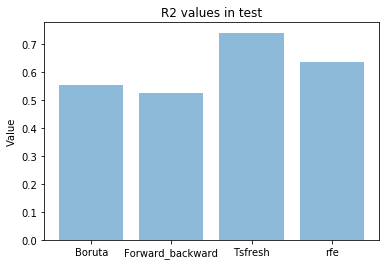

In [655]:
y_pos = np.arange(len(names))
performance = R2_test_values
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, names)
plt.ylabel('Value')
plt.title('R2 values in test')
plt.show()

<u><h3><b>MSE VALUES IN TEST</b></h3></u>

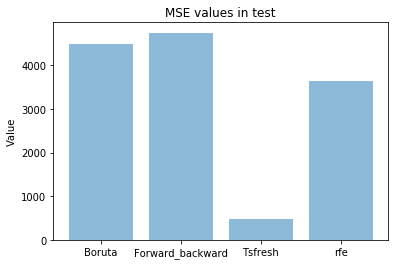

In [656]:
y_pos = np.arange(len(names))
performance = MSE_test_values
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, names)
plt.ylabel('Value')
plt.title('MSE values in test')
plt.show()

<u><h3><b>MAE VALUES IN TEST</b></h3></u>

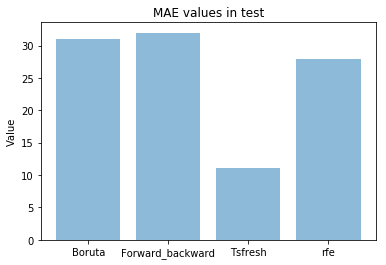

In [657]:
y_pos = np.arange(len(names))
performance = MAE_test_values
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, names)
plt.ylabel('Value')
plt.title('MAE values in test')
plt.show()

<u><h3><b>RMSE VALUES IN TEST</b></h3></u>

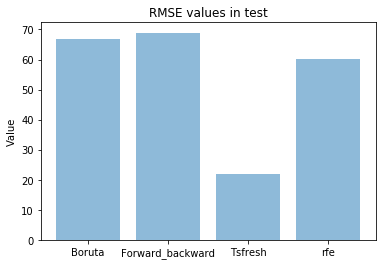

In [658]:
y_pos = np.arange(len(names))
performance = RMSE_test_values
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, names)
plt.ylabel('Value')
plt.title('RMSE values in test')
plt.show()

<u><h2><b>IMPLEMENTATION OF TPOT</b></h2></u>

In [486]:
from sklearn.cross_validation import train_test_split  
from tpot import TPOTRegressor  
X = X1.values  
y = Y1.values  
X_train, X_test, y_train, y_test = train_test_split(X, y,  
                                                train_size=0.75,  
                                                test_size=0.25)  
my_tpot = TPOTRegressor(generations=5, population_size = 20 , verbosity= 2)
my_tpot.fit(X_train, y_train)  
print(my_tpot.score(X_test, y_test))

Optimization Progress:  33%|███▎      | 40/120 [11:33<25:15, 18.94s/pipeline]  

Generation 1 - Current best internal CV score: -6148.802158466199


Optimization Progress:  50%|█████     | 60/120 [42:23<3:43:24, 223.41s/pipeline]

Generation 2 - Current best internal CV score: -6059.968447525783


Optimization Progress:  67%|██████▋   | 80/120 [1:32:08<36:11, 54.29s/pipeline]    

Generation 3 - Current best internal CV score: -5737.384617534397


Optimization Progress:  84%|████████▍ | 101/120 [2:01:32<29:04, 91.82s/pipeline]  

Generation 4 - Current best internal CV score: -5733.0574745793765


Generation 5 - Current best internal CV score: -5733.0574745793765

Best pipeline: ExtraTreesRegressor(RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.5, min_samples_leaf=20, min_samples_split=8, n_estimators=100), bootstrap=True, max_features=0.55, min_samples_leaf=5, min_samples_split=11, n_estimators=100)
-5108.85878747
